# ANÁLISIS UNIVARIANTE

El análisis univariante es una técnica estadística que se utiliza para analizar y describir una variable individual en un conjunto de datos. En lugar de examinar las relaciones entre múltiples variables, el análisis univariante se enfoca en comprender las características y propiedades de una sola variable a la vez.

El análisis univariante puede incluir varias técnicas y medidas, como:

1. Medidas de tendencia central: Estas medidas, como la media, la mediana y la moda, se utilizan para describir el valor central o típico de una variable.

2. Medidas de dispersión: Estas medidas, como la desviación estándar y el rango, se utilizan para describir cuánto se dispersan los valores de una variable alrededor de la medida central.

3. Gráficos de distribución: Los histogramas, diagramas de caja y bigotes, y gráficos de densidad son ejemplos de gráficos utilizados en el análisis univariante para visualizar la distribución de una variable y detectar patrones o formas específicas.

4. Análisis de frecuencia: Este análisis implica contar y resumir la frecuencia de diferentes valores o categorías de una variable. Se puede utilizar para identificar valores atípicos, valores más comunes o patrones de frecuencia.

5. Pruebas de hipótesis: En el análisis univariante, también se pueden realizar pruebas estadísticas para evaluar si hay diferencias significativas entre grupos o categorías de una variable.

El análisis univariante es una etapa importante en cualquier análisis de datos, ya que proporciona una comprensión inicial y detallada de una variable individual. Ayuda a resumir y describir las características clave de una variable, identificar patrones o tendencias y detectar valores atípicos o anómalos.

## 1. Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Suprimir los warnings
warnings.filterwarnings('ignore')

from math import pi
from ydata_profiling import ProfileReport

## 2. Cargar datos

In [3]:
ruta = '../data/calidad_aire_clean_outliers.csv'
df = pd.read_csv(ruta, sep=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


## 3. Preparar datos

* Crear nuevas columnas categóricas
* Transformar columnas
* Seleccionar las columnas sobre las que realizar EDA


In [4]:
# Explorar columnas del dataset, para crear,transformar y eliminar las que sean necesarias para el análisis
df.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA'],
      dtype='object')

#### 3.1  Crear columna 'ESCALA_ICA'

El objetivo de esta columna es analizar la Calidad del Aire en funcián de los rangos de medición establecidos por el Ayuntamiento de Madrid.

Escala de calidad del aire globar y por contaminante: 

                Muy Buena   Buena     Regular    Mala     Muy Mala      Peligrosa

    * ICA:      0-19        20-49     50-99     100-149  150-249        250+
    * PM2.5:    0-15 	16-30     31-55     56-110   >110
    * PM10:     0-25 	26-50 	  51-90     91-180   >180
    * NO2:      0-50 	51-100   101-200    201-400  >400
    * O3: 	    0-60        61-120   121-180    181-240  >240
    * SO2: 	    0-50        51-100   101-350    351-500  >500

In [5]:
# Crear la columna "escala_ica" basada en los valores de la columna "ICA"
df['ESCALA_ICA'] = pd.cut(df['ICA'], bins=[-float('inf'), 19, 49, 99, 149, 249, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala', 'Peligrosa'])
df['ESCALA_PM2.5'] = pd.cut(df['PM2.5'], bins=[-float('inf'), 15, 30, 55, 110, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])
df['ESCALA_PM10'] = pd.cut(df['PM10'], bins=[-float('inf'), 25, 50, 90, 180, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])
df['ESCALA_NO2'] = pd.cut(df['NO2'], bins=[-float('inf'), 50, 100, 200, 400, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])
df['ESCALA_O3'] = pd.cut(df['O3'], bins=[-float('inf'), 60, 120, 180, 240, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])
df['ESCALA_SO2'] = pd.cut(df['SO2'], bins=[-float('inf'), 50, 100, 350, 500, float('inf')], labels=['Muy Buena', 'Buena', 'Regular', 'Mala', 'Muy Mala'])

# Imprimir el resultado
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,ICA_PM10,ICA_O3,ICA_NO2,ICA,ESCALA_ICA,ESCALA_PM2.5,ESCALA_PM10,ESCALA_NO2,ESCALA_O3,ESCALA_SO2
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,38.0,9.90,125.0,45.22,Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,32.0,6.64,137.5,45.64,Buena,Muy Buena,Muy Buena,Buena,Muy Buena,Muy Buena


#### 3.2 Crear columna 'TRAMO_HORA'

Esta columna dividirá la columna 'HORA' en dos tramos:

* Punta:  8 a 20
* Valle:  21 a 7

In [6]:
# Convertir la columna "FECHA" en un objeto de fecha y hora
df['HORA'] = pd.to_datetime(df['FECHA']).dt.hour

# Definir la función para clasificar el tramo de hora
def clasificar_tramo_hora(hora):
    if 8 <= hora <= 20:
        return 'Hora Punta'
    else:
        return 'Hora Valle'

# Crear la columna "TRAMO_HORA"
df['TRAMO_HORA'] = df['HORA'].apply(clasificar_tramo_hora)

# Mostrar el DataFrame resultante
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,ICA_O3,ICA_NO2,ICA,ESCALA_ICA,ESCALA_PM2.5,ESCALA_PM10,ESCALA_NO2,ESCALA_O3,ESCALA_SO2,TRAMO_HORA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,9.90,125.0,45.22,Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Hora Valle
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,6.64,137.5,45.64,Buena,Muy Buena,Muy Buena,Buena,Muy Buena,Muy Buena,Hora Valle


#### 3.3 Transformar columnas de FECHA

Transformar estas columnas a formato datetime

* FECHA
* ANO
* MES
* DIA

In [7]:
# Convertir la columna "FECHA" en un objeto de fecha y hora
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['ANO'] = pd.to_datetime(df['FECHA']).dt.year
df['MES'] = pd.to_datetime(df['FECHA']).dt.month
df['DIA'] = pd.to_datetime(df['FECHA']).dt.day
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,ICA_O3,ICA_NO2,ICA,ESCALA_ICA,ESCALA_PM2.5,ESCALA_PM10,ESCALA_NO2,ESCALA_O3,ESCALA_SO2,TRAMO_HORA
0,2019-01-01 05:00:00,2019,1,1,5,Martes,8.0,10.0,0.4,50.0,...,9.90,125.0,45.22,Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Hora Valle
1,2019-01-01 06:00:00,2019,1,1,6,Martes,8.0,8.0,0.4,55.0,...,6.64,137.5,45.64,Buena,Muy Buena,Muy Buena,Buena,Muy Buena,Muy Buena,Hora Valle


In [8]:
# Comprobar si se ha realizado las transformaciones
df.dtypes

FECHA           datetime64[ns]
ANO                      int64
MES                      int64
DIA                      int64
HORA                     int64
DIA_SEMANA              object
ESTACION               float64
SO2                    float64
CO                     float64
NO2                    float64
PM2.5                  float64
PM10                   float64
O3                     float64
BTX                    float64
TEMPERATURA            float64
HUMEDAD                float64
ICA_SO2                float64
ICA_PM10               float64
ICA_O3                 float64
ICA_NO2                float64
ICA                    float64
ESCALA_ICA            category
ESCALA_PM2.5          category
ESCALA_PM10           category
ESCALA_NO2            category
ESCALA_O3             category
ESCALA_SO2            category
TRAMO_HORA              object
dtype: object

#### 3.4 Eliminar columnas

Eliminar aquellas columnas que no son necesarias para el EDA

In [9]:
df.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA', 'ESCALA_ICA',
       'ESCALA_PM2.5', 'ESCALA_PM10', 'ESCALA_NO2', 'ESCALA_O3', 'ESCALA_SO2',
       'TRAMO_HORA'],
      dtype='object')

In [10]:
# Se eliminan las columnas númericas que no interesan para las estadisticas 
df_hist = df.drop(['FECHA','ANO','MES','DIA','HORA','ESTACION','ICA_SO2','ICA_PM10','ICA_O3','ICA_NO2'],axis=1)
df_hist.head(2)

,DIA_SEMANA,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA,ESCALA_ICA,ESCALA_PM2.5,ESCALA_PM10,ESCALA_NO2,ESCALA_O3,ESCALA_SO2,TRAMO_HORA
0,Martes,10.0,0.4,50.0,14.0,19.0,11.88,2.6,4.7,50.0,45.22,Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Muy Buena,Hora Valle
1,Martes,8.0,0.4,55.0,12.0,16.0,7.97,2.2,3.2,55.0,45.64,Buena,Muy Buena,Muy Buena,Buena,Muy Buena,Muy Buena,Hora Valle


## 4. EDA (Análisis Exploratorio Univariante)

####  4.1.1 Estadísticas Descriptivas

In [11]:
df_hist.describe().round(2)

,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA
count,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00,30860.00
mean,4.85,0.25,31.53,7.77,15.07,53.31,2.28,16.42,54.96,39.31
std,3.03,0.09,17.31,5.25,9.00,25.18,1.55,7.96,21.73,11.94
min,0.00,0.10,3.00,0.00,1.00,0.79,0.00,-2.90,8.00,12.94
25%,2.00,0.20,18.00,4.00,8.00,35.56,1.10,10.20,38.00,30.55
50%,4.00,0.20,29.00,7.00,14.00,52.04,1.90,15.50,54.00,37.99
75%,8.00,0.30,42.00,10.00,19.00,69.48,3.10,22.20,71.00,46.26
max,17.00,0.40,97.00,26.00,46.00,127.20,7.90,40.00,100.00,96.86


#### 4.1.2. Visualización con Gráficos de Densidad

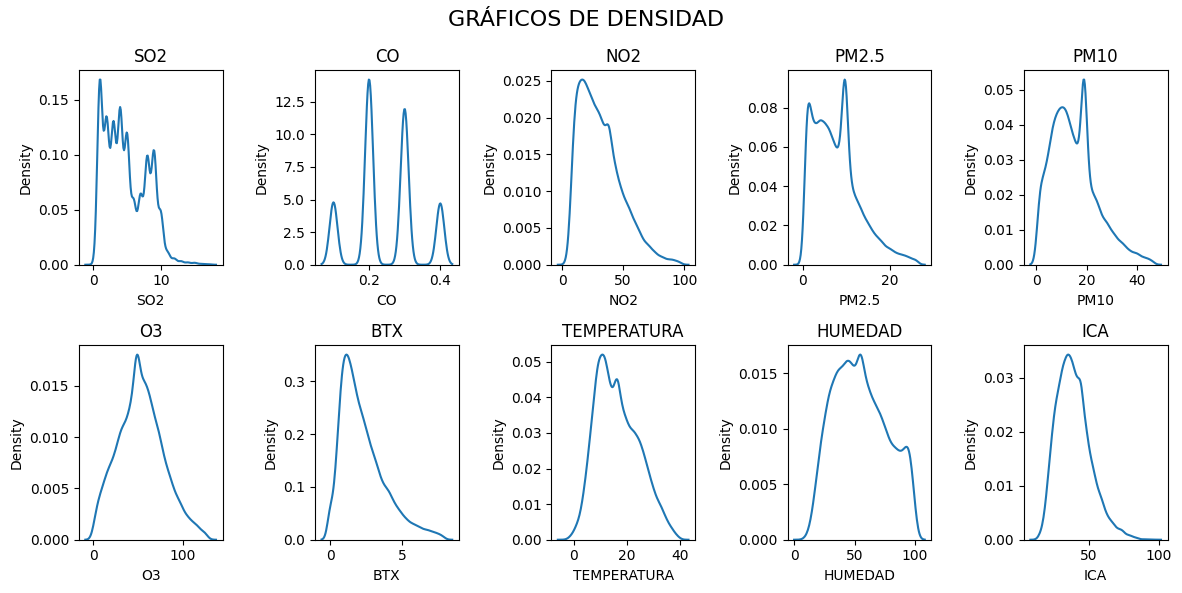

In [12]:

numeric_columns = df_hist.select_dtypes(include=np.number).columns.to_list()
num_plots = len(numeric_columns)
num_cols = 5
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6))


for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols

    axs[row, col].set_title(f'{column}')
    sns.kdeplot(data=df, x=column, ax=axs[row, col])
    
# Agregar título general a la figura
plt.suptitle('GRÁFICOS DE DENSIDAD', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=1)
plt.tight_layout()
plt.show()

#### 4.1.2 Histogramas para cada varible numérica en subplots

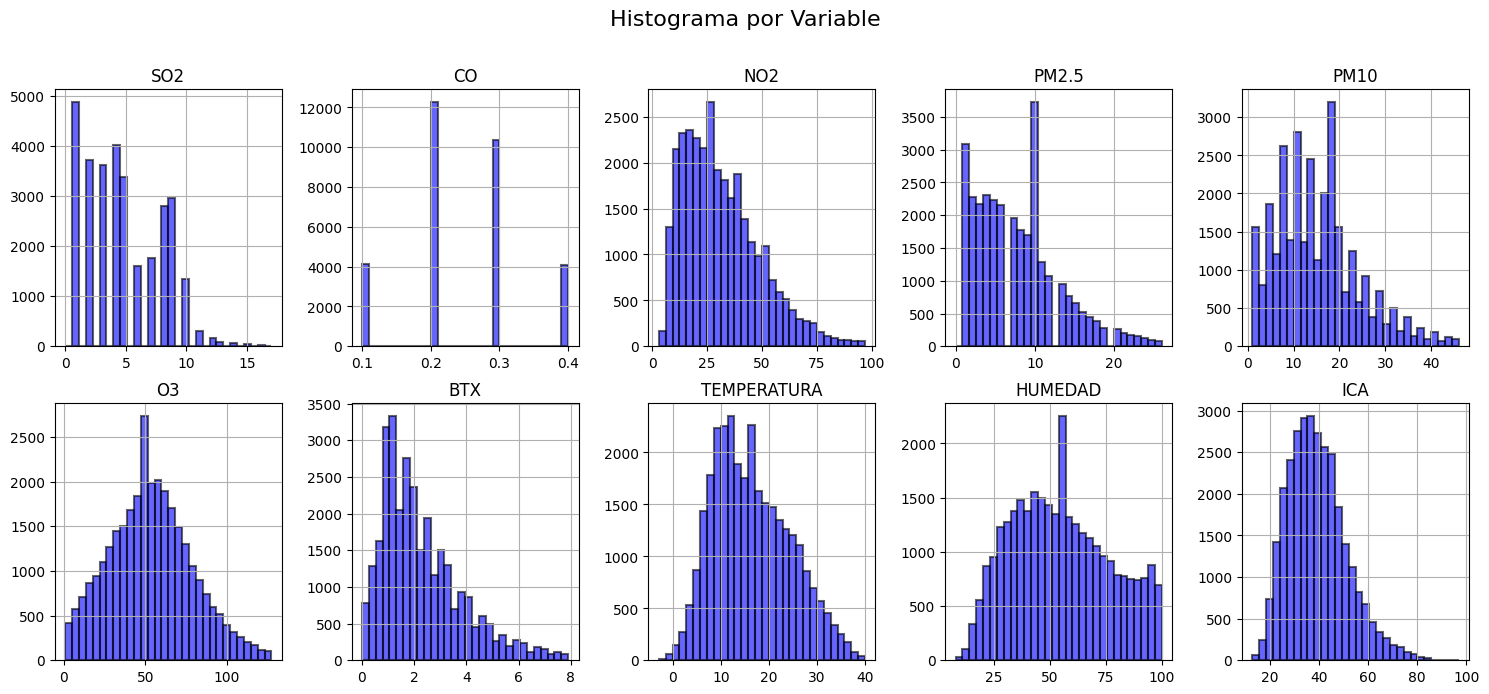

In [13]:
# Graficar los histogramas en subplots
df_hist.hist(bins=30, alpha=0.6, color='b', edgecolor='k', linewidth=1.5, figsize=(15, 10), layout=(3, 5))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Agregar título general
plt.suptitle('Histograma por Variable', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=0.9)

# Mostrar los histogramas
plt.show()

    CONCLUSIÓN:

    Con la observación de los histogramas podemos verificar: 

    * La distribución es normal, es decir, tiene forma de campana, en las varibles  O3, TEMPERATURA e ICA 

    * La distribución está sesgada, es decir, tiene forma de campana pero asimétrica, en las variables NO2, PM2.5, PM10, BTX y HUMEDAD.

    * La distribución sufre variaciones en el tiempo, en las variables SO2 y CO.

####  4.2. Visualización columnas categóricas

In [14]:
df.dtypes

FECHA           datetime64[ns]
ANO                      int64
MES                      int64
DIA                      int64
HORA                     int64
DIA_SEMANA              object
ESTACION               float64
SO2                    float64
CO                     float64
NO2                    float64
PM2.5                  float64
PM10                   float64
O3                     float64
BTX                    float64
TEMPERATURA            float64
HUMEDAD                float64
ICA_SO2                float64
ICA_PM10               float64
ICA_O3                 float64
ICA_NO2                float64
ICA                    float64
ESCALA_ICA            category
ESCALA_PM2.5          category
ESCALA_PM10           category
ESCALA_NO2            category
ESCALA_O3             category
ESCALA_SO2            category
TRAMO_HORA              object
dtype: object

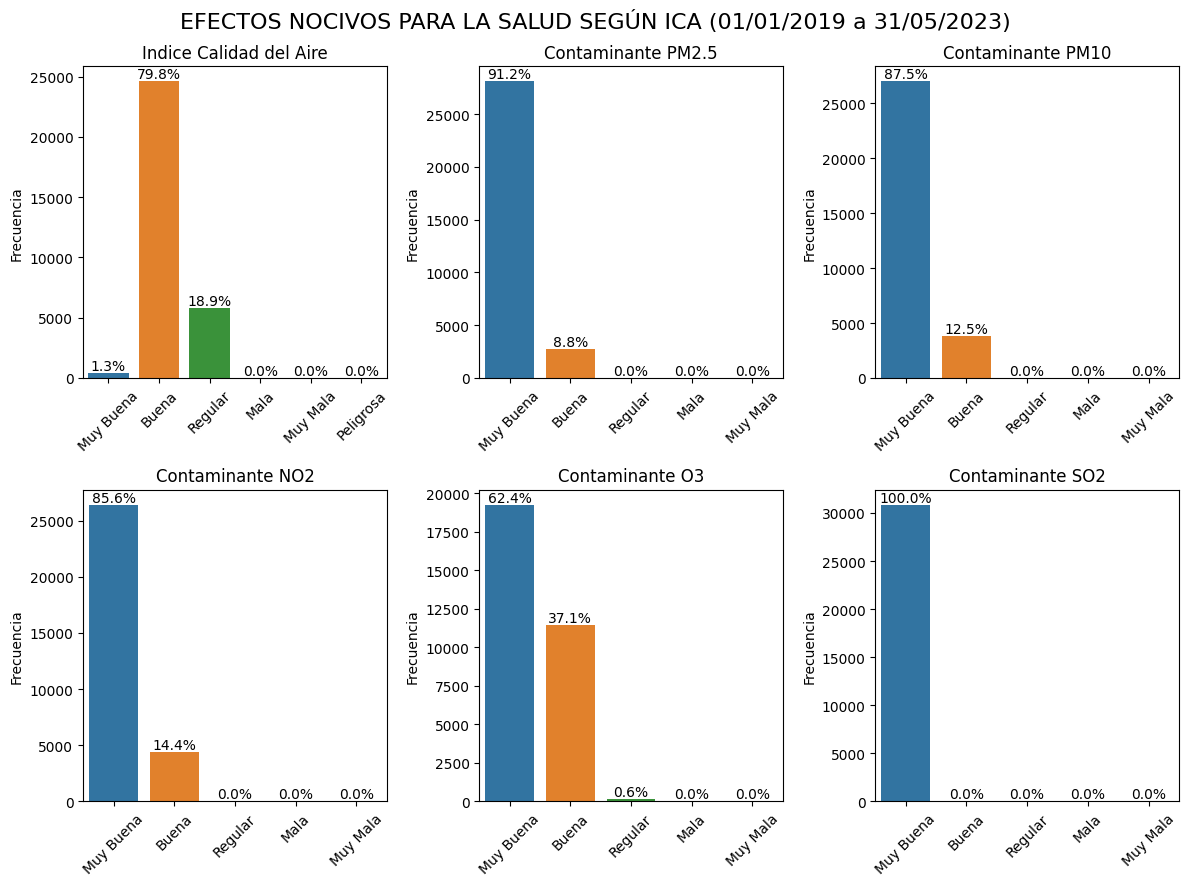

In [16]:
categorical_columns = df.select_dtypes(include='category').columns.to_list()

num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots + 1) // num_cols  # División entera redondeada hacia arriba

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 9))

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.countplot(data=df, x=column, ax=ax)
    
    # Cambiar título según la columna
    if  column == 'ESCALA_PM2.5':
        ax.set_title('Contaminante PM2.5')
    elif column == 'ESCALA_PM10':
        ax.set_title('Contaminante PM10')
    elif column == 'ESCALA_NO2':
        ax.set_title('Contaminante NO2')
    elif column == 'ESCALA_O3':
        ax.set_title('Contaminante O3')
    elif column == 'ESCALA_SO2':
        ax.set_title('Contaminante SO2')
    else:
        ax.set_title('Indice Calidad del Aire')
    
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')

    # Rotar el eje x
    ax.tick_params(axis='x', rotation=45)

    # Mostrar el porcentaje en la parte superior de cada barra
    total = len(df)
    for p in ax.patches:
        percentage = (p.get_height() / total * 100)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='bottom')
    
# Eliminar subparcelas vacías si es necesario
if num_plots % num_cols != 0:
    fig.delaxes(axes[-1, -1])

# Agregar título general a la figura
plt.suptitle('EFECTOS NOCIVOS PARA LA SALUD SEGÚN ICA (01/01/2019 a 31/05/2023)', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=1)

plt.tight_layout()
plt.show()


    CONCLUSIÓN:

    Estos gráficos de barras muestan el porcentaje en que el Indice de Calidad del Aire (ICA) y las concentracciones de los contaminantes han sido nocivos para la salud,  en el período de 01/01/2019 a 31/05/2023.
  
    Resumen por contamiente y el efecto que produce en la salud:

    * ICA: Ha resultado nocivo para la salud un 18.9% de las ocasiones.
    * PM2.5: Ha resultado nocivo para la salud un 8.8% de las ocasiones. 
        - La inhalación de estas partículas afectan de forma grave a los pulmones y el corazón.
        - La exposición a estas partículas puede provocar tos o dificultad para respirar, agravar el asma y desarrollar enfermedades respiratorias crónicas. 
    
    * PM10: Ha sido nocivo para la salud un 12.5% de las ocasiones.
        - La exposición puede provocar irritación de ojos y garganta, tos, dificultad para respirar y puede agravar el asma.

    * NO2, SO2 y O3: No ha resultado nocivo para la salud en el período de tiempo analizado, puesto que no han superado los umbrales permitidos.

#### 4.3. Visualización histórico de Fecha

* Mediante está visualización se puedes observara si existe estacionalidad de Indice de Calidad del aire (ICA) en el tiempo (01/2019 a 05/2023)

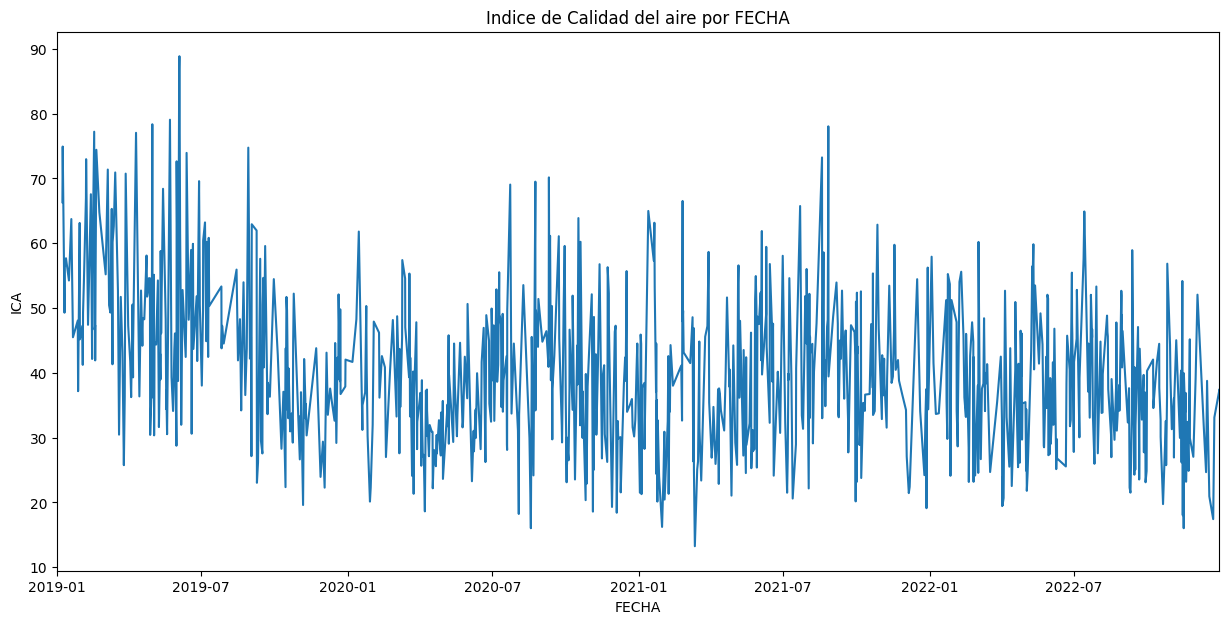

In [17]:
date_columns = df.select_dtypes(include='datetime64').columns.to_list()

for column in date_columns:
    plt.figure(figsize=(15,7))
    
    sns.lineplot(data=df.sample(1000), x=column, y='ICA')
    plt.title('Indice de Calidad del aire por ' + column)
    plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2022-12-31'))
    plt.show()

    CONCLUSIONES: 

    En esta gráfica se puede observar como a lo largo del año 2019 el ICA era más elevado, observando una disminución en torno a Julio de 2019, manteniéndose constante hasta Julio de 2021, mes en el que vuelve a sufrir un fuerte incremento, volviéndose a reducir en torno a Septiembre de 2021 y manteniéndose constante hasta aproximadamen Junio/Julio de 2022. 

    Observando esta gráfica podemos concluir que el ICA sufre incrementos durante los meses de verano, vólviendose a reducir en Otoño y manteniéndose constante a lo largo del año.